# Day 27 – Advanced EDA with Movie Ratings Dataset

In this notebook, I perform **Exploratory Data Analysis (EDA)** on the `Movie-Rating.csv` dataset to analyze and visualize patterns in how movies are rated.

---
## Dataset Overview
The dataset contains the following columns:
- **Film** → Name of the movie
- **Genre** → Category of the movie (e.g., Action, Comedy, Drama)
- **Rotten Tomatoes Ratings %** → Critic scores
- **Audience Ratings %** → Viewer scores
- **Budget (Millions)** → Movie budget in millions  
- **Year** → Release year of the movie

---
## Objectives:
1. Load and inspect the dataset
2. Perform basic preprocessing
3. Visualize:
   - Distribution of ratings
   - Most popular movies
   - Genre frequency
   - Year-wise trends in ratings
---



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv(r"C:\Users\Arman\Downloads\dataset\Movie-Rating.csv")

In [3]:
movies

Film      Genre  Rotten Tomatoes Ratings %  \
0    (500) Days of Summer      Comedy                         87   
1              10,000 B.C.  Adventure                          9   
2               12 Rounds      Action                         30   
3                127 Hours  Adventure                         93   
4                17 Again      Comedy                         55   
..                     ...        ...                        ...   
554          Your Highness     Comedy                         26   
555        Youth in Revolt     Comedy                         68   
556                 Zodiac   Thriller                         89   
557            Zombieland      Action                         90   
558              Zookeeper     Comedy                         14   

     Audience Ratings %  Budget (million $)  Year of release  
0                    81                   8             2009  
1                    44                 105             2008  
2                    52                  20             2009  
3                    84                  18             2010  
4                    70                  20             2009  
..                  ...                 ...              ...  
554                  36                  50             2011  
555                  52                  18             2009  
556                  73                  65             2007  
557                  87                  24             2009  
558                  42                  80             2011  

[559 rows x 6 columns]

In [4]:
len(movies)

559

In [5]:
movies.head()

Film      Genre  Rotten Tomatoes Ratings %  \
0  (500) Days of Summer      Comedy                         87   
1            10,000 B.C.  Adventure                          9   
2             12 Rounds      Action                         30   
3              127 Hours  Adventure                         93   
4              17 Again      Comedy                         55   

   Audience Ratings %  Budget (million $)  Year of release  
0                  81                   8             2009  
1                  44                 105             2008  
2                  52                  20             2009  
3                  84                  18             2010  
4                  70                  20             2009

In [6]:
movies.tail()

Film     Genre  Rotten Tomatoes Ratings %  Audience Ratings %  \
554    Your Highness    Comedy                         26                  36   
555  Youth in Revolt    Comedy                         68                  52   
556           Zodiac  Thriller                         89                  73   
557      Zombieland     Action                         90                  87   
558        Zookeeper    Comedy                         14                  42   

     Budget (million $)  Year of release  
554                  50             2011  
555                  18             2009  
556                  65             2007  
557                  24             2009  
558                  80             2011

In [7]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating','BudgetMillions','Year']

In [9]:
movies.head() 

Film      Genre  CriticRating  AudienceRating  \
0  (500) Days of Summer      Comedy            87              81   
1            10,000 B.C.  Adventure             9              44   
2             12 Rounds      Action            30              52   
3              127 Hours  Adventure            93              84   
4              17 Again      Comedy            55              70   

   BudgetMillions  Year  
0               8  2009  
1             105  2008  
2              20  2009  
3              18  2010  
4              20  2009

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [11]:
movies.describe()

CriticRating  AudienceRating  BudgetMillions         Year
count    559.000000      559.000000      559.000000   559.000000
mean      47.309481       58.744186       50.236136  2009.152057
std       26.413091       16.826887       48.731817     1.362632
min        0.000000        0.000000        0.000000  2007.000000
25%       25.000000       47.000000       20.000000  2008.000000
50%       46.000000       58.000000       35.000000  2009.000000
75%       70.000000       72.000000       65.000000  2010.000000
max       97.000000       96.000000      300.000000  2011.000000

In [12]:
movies['Film']

0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: object

In [13]:
movies.Film

0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: object

In [14]:
movies.Film = movies.Film.astype('category')

In [15]:
movies.Film

0      (500) Days of Summer 
1                10,000 B.C.
2                 12 Rounds 
3                  127 Hours
4                  17 Again 
               ...          
554            Your Highness
555          Youth in Revolt
556                   Zodiac
557              Zombieland 
558                Zookeeper
Name: Film, Length: 559, dtype: category
Categories (559, object): ['(500) Days of Summer ', '10,000 B.C.', '12 Rounds ', '127 Hours', ..., 'Youth in Revolt', 'Zodiac', 'Zombieland ', 'Zookeeper']

In [16]:
movies.head()

Film      Genre  CriticRating  AudienceRating  \
0  (500) Days of Summer      Comedy            87              81   
1            10,000 B.C.  Adventure             9              44   
2             12 Rounds      Action            30              52   
3              127 Hours  Adventure            93              84   
4              17 Again      Comedy            55              70   

   BudgetMillions  Year  
0               8  2009  
1             105  2008  
2              20  2009  
3              18  2010  
4              20  2009

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 43.6+ KB


In [18]:
movies.Genre = movies.Genre.astype('category')

In [19]:
movies.Genre

0         Comedy
1      Adventure
2         Action
3      Adventure
4         Comedy
         ...    
554       Comedy
555       Comedy
556     Thriller
557       Action
558       Comedy
Name: Genre, Length: 559, dtype: category
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

In [20]:
movies.Year = movies.Year.astype('category')

In [21]:
movies.Year

0      2009
1      2008
2      2009
3      2010
4      2009
       ... 
554    2011
555    2009
556    2007
557    2009
558    2011
Name: Year, Length: 559, dtype: category
Categories (5, int64): [2007, 2008, 2009, 2010, 2011]

In [22]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [23]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [24]:
movies.describe()

CriticRating  AudienceRating  BudgetMillions
count    559.000000      559.000000      559.000000
mean      47.309481       58.744186       50.236136
std       26.413091       16.826887       48.731817
min        0.000000        0.000000        0.000000
25%       25.000000       47.000000       20.000000
50%       46.000000       58.000000       35.000000
75%       70.000000       72.000000       65.000000
max       97.000000       96.000000      300.000000

## JointPlots

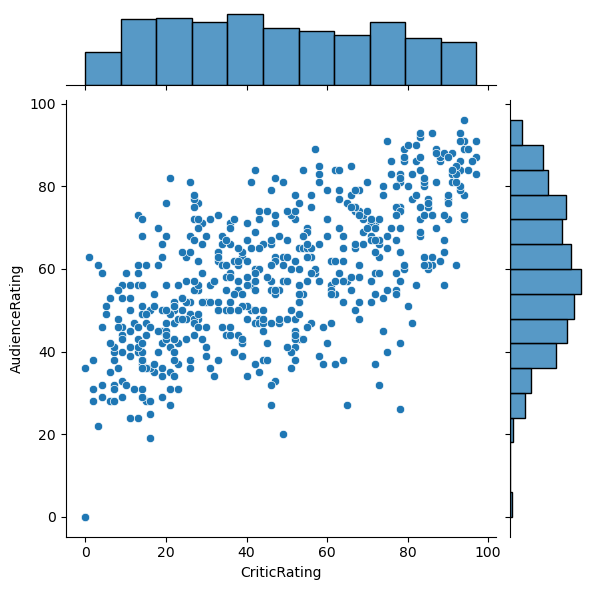

In [25]:
j = sns.jointplot( data = movies, x = 'CriticRating', y = 'AudienceRating')
plt.show()

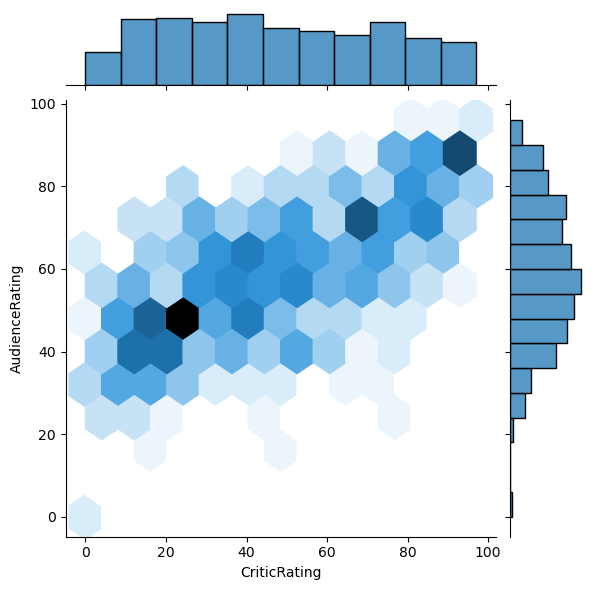

In [26]:
j = sns.jointplot( data = movies, x = 'CriticRating', y = 'AudienceRating', kind='hex')
plt.show()

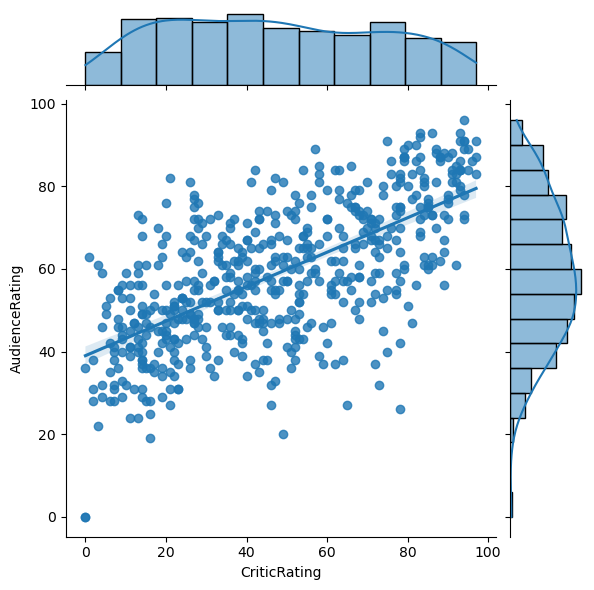

In [27]:
j = sns.jointplot( data = movies, x = 'CriticRating', y = 'AudienceRating', kind='reg')
plt.show()

## Histograms

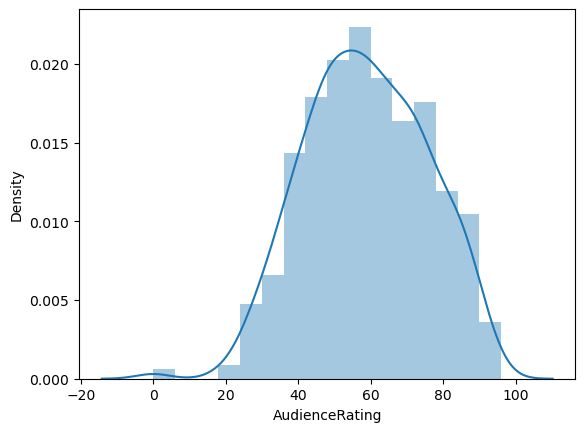

In [28]:
#Chart - 1

m1 = sns.distplot(movies.AudienceRating)
plt.show()

In [29]:
sns.set_style('darkgrid')

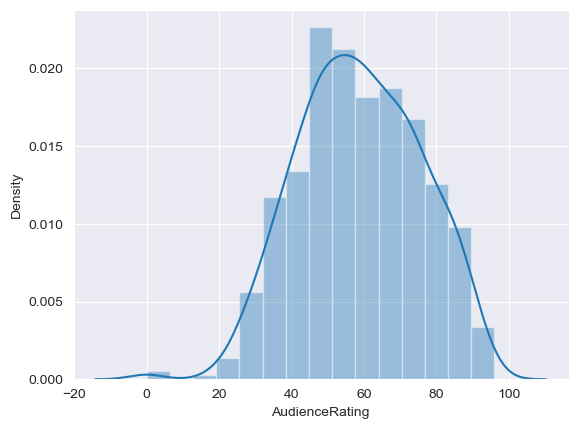

In [30]:
m2 = sns.distplot(movies.AudienceRating, bins = 15)
plt.show()

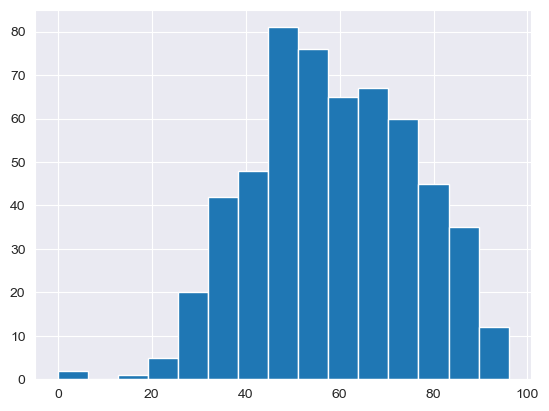

In [31]:
#sns.set_style('darkgrid')
n1 = plt.hist(movies.AudienceRating, bins=15)
plt.show()

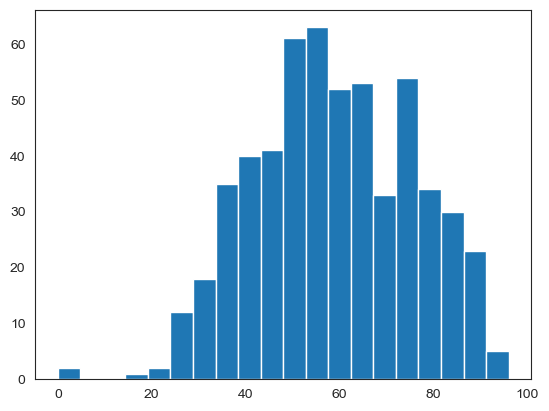

In [32]:
sns.set_style('white') #normal distribution & called as bell curve
n1 = plt.hist(movies.AudienceRating, bins=20)
plt.show()

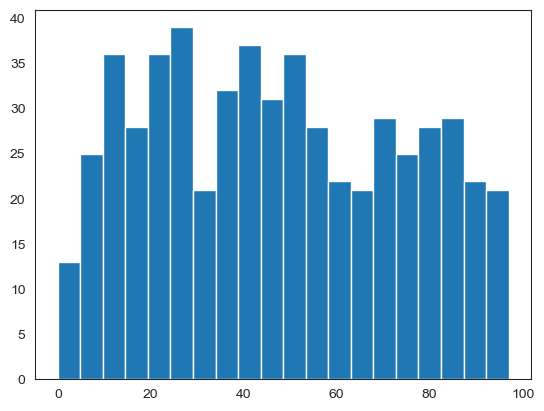

In [33]:
n1 = plt.hist(movies.CriticRating, bins=20) #uniform distribution
plt.show()

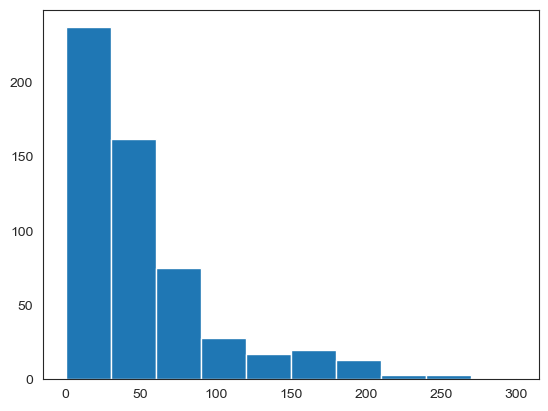

In [34]:
#chart - 2

#h1 = plt.hist(movies.BudgetMillions)

plt.hist(movies.BudgetMillions)
plt.show()

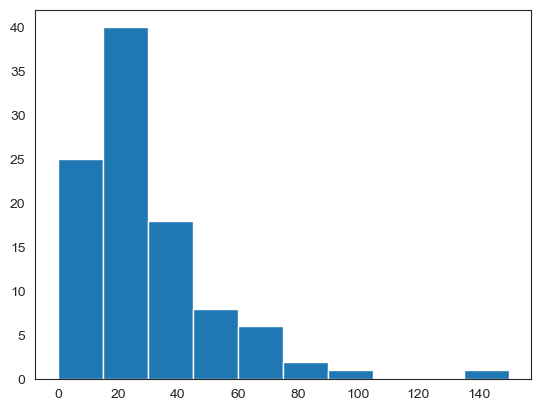

In [35]:
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.show()

In [36]:
movies.head()

Film      Genre  CriticRating  AudienceRating  \
0  (500) Days of Summer      Comedy            87              81   
1            10,000 B.C.  Adventure             9              44   
2             12 Rounds      Action            30              52   
3              127 Hours  Adventure            93              84   
4              17 Again      Comedy            55              70   

   BudgetMillions  Year  
0               8  2009  
1             105  2008  
2              20  2009  
3              18  2010  
4              20  2009

In [37]:
movies.Genre.unique()

['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance', 'Thriller']
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

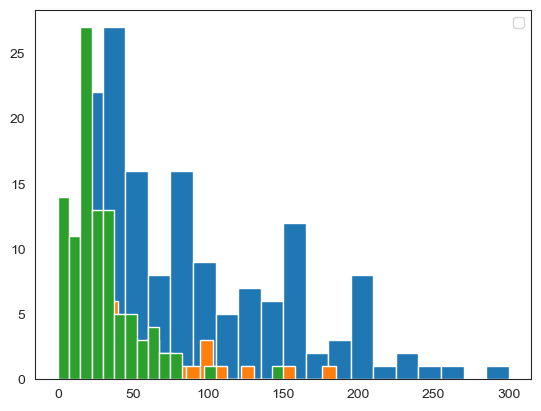

In [38]:
# Below plots are stacked histogram becuase overlaped

plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 20)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 20)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 20)
plt.legend()
plt.show()  

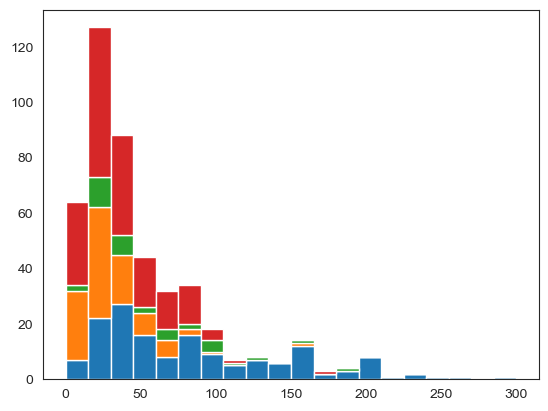

In [39]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
          movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Thriller'].BudgetMillions, \
          movies[movies.Genre == 'Comedy'].BudgetMillions],
         bins = 20, stacked = True)
plt.show()  

In [40]:
# if you have 100 categories you cannot copy & paste all the things

for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


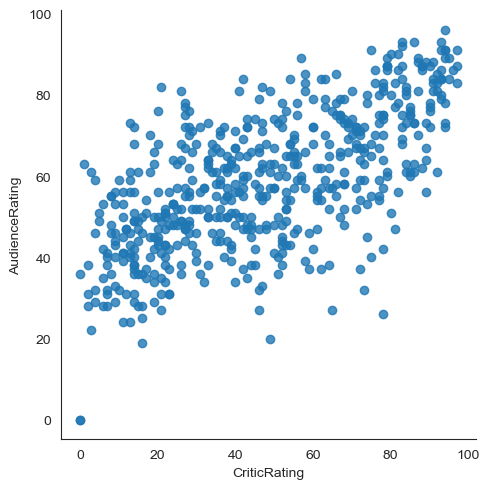

In [41]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False)
plt.show()

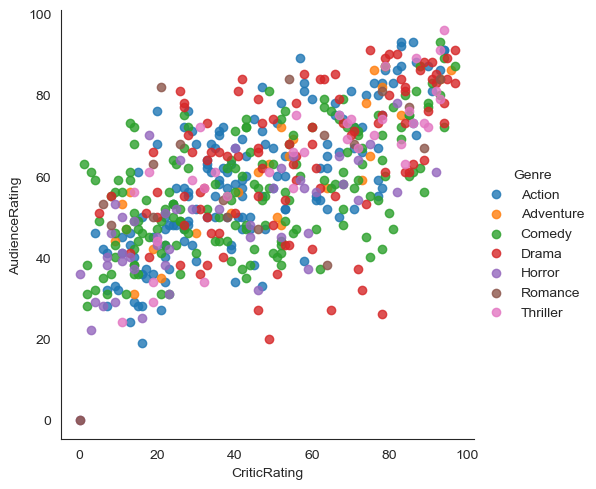

In [42]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue = 'Genre')
plt.show()

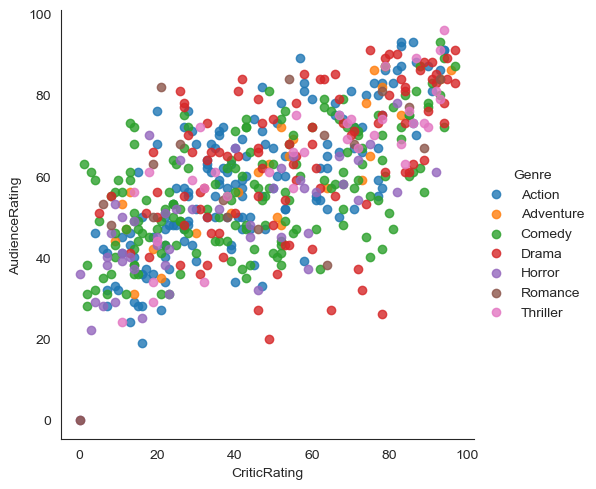

In [43]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue = 'Genre',aspect=1) 
plt.show()

## Kernal Density Estimate plot ( KDE PLOT) 

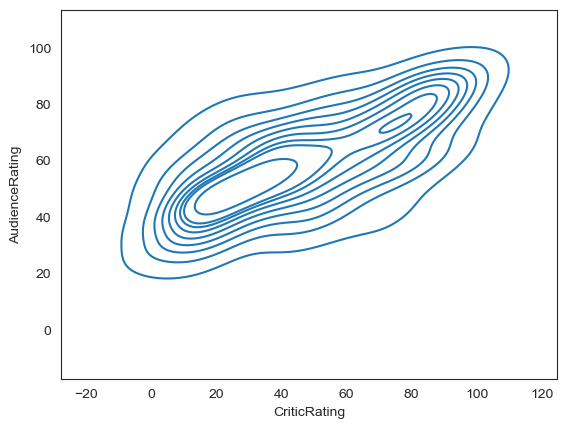

In [44]:
k1 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating)
plt.show()
# where do u find more density and how density is distibuted across from the the chat 
# center point is kernal this is calld KDE & insteade of dots it visualize like this
# we can able to clearly see the spread at the audience ratings

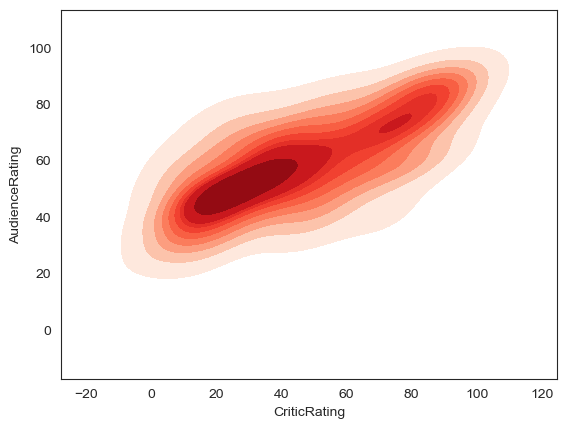

In [45]:
k1 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,shade = True,shade_lowest=False,cmap='Reds')
plt.show()

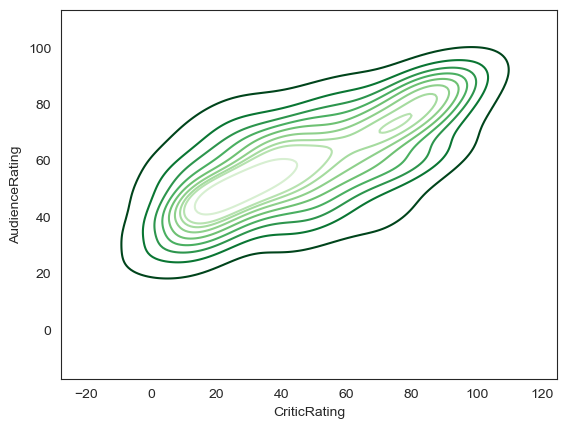

In [46]:
k2 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,shade_lowest=False,cmap='Greens_r')
plt.show()

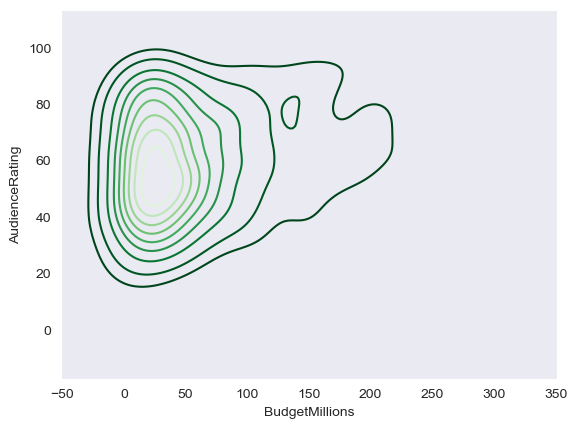

In [47]:
sns.set_style('dark')
k1 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating,shade_lowest=False,cmap='Greens_r')
plt.show()

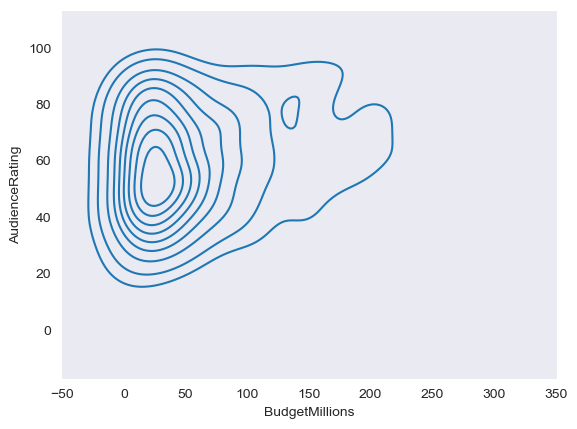

In [48]:
sns.set_style('dark')
k1 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating)
plt.show()

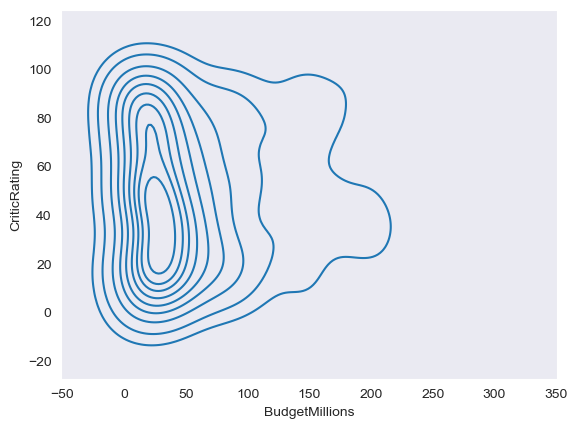

In [49]:
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating)
plt.show()

## Subplots

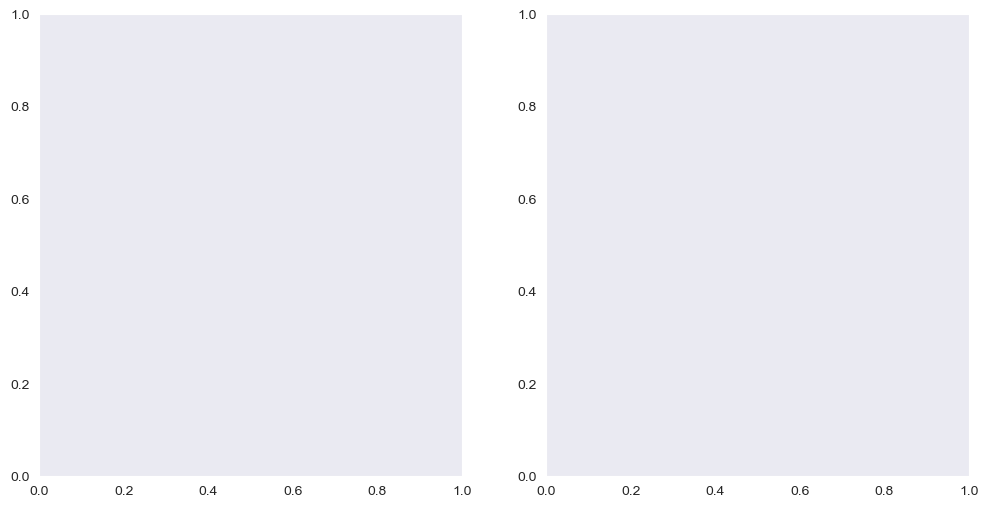

In [50]:
f, ax = plt.subplots(1,2, figsize =(12,6))
plt.show()

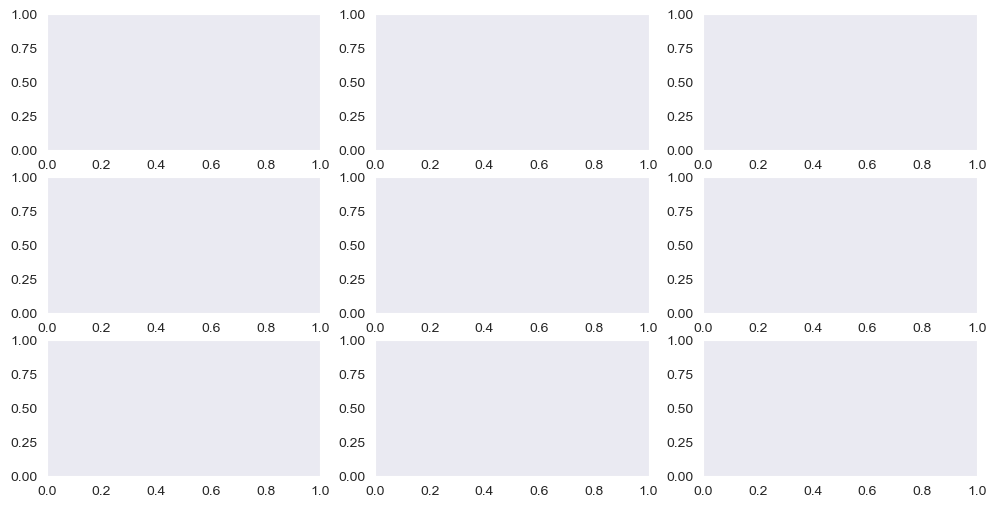

In [51]:
f, ax = plt.subplots(3,3, figsize =(12,6))
plt.show()

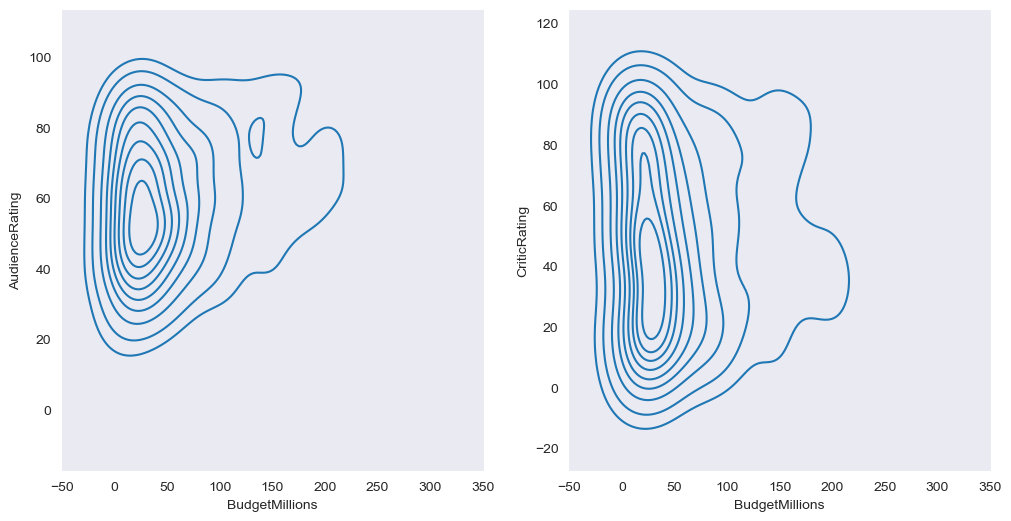

In [52]:
f, axes = plt.subplots(1,2, figsize =(12,6))

k1 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating,ax=axes[0])
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating,ax = axes[1])
plt.show()

In [53]:
axes

array([<Axes: xlabel='BudgetMillions', ylabel='AudienceRating'>,
       <Axes: xlabel='BudgetMillions', ylabel='CriticRating'>],
      dtype=object)

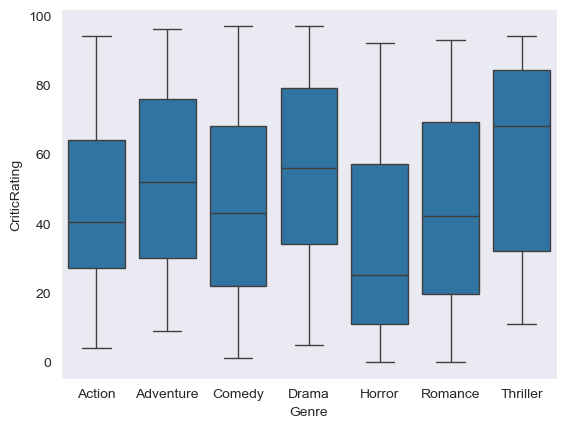

In [54]:
#boxplots
w = sns.boxplot(data=movies, x='Genre', y = 'CriticRating')
plt.show()

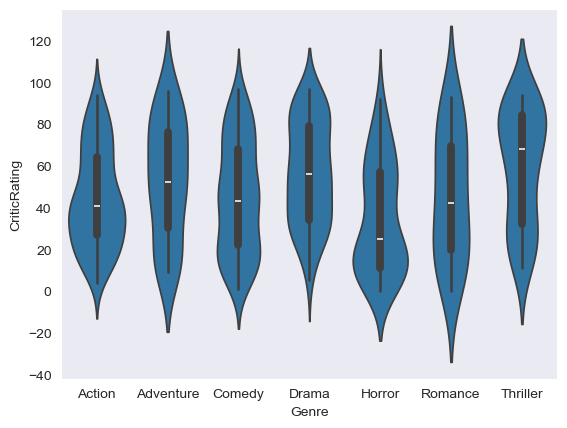

In [55]:
#violin plot

z = sns.violinplot(data=movies, x='Genre', y = 'CriticRating') 
plt.show()

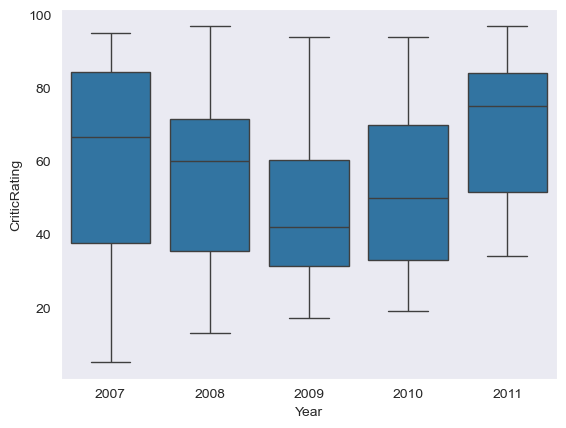

In [56]:
w1 = sns.boxplot(data=movies[movies.Genre == 'Drama'], x='Year', y = 'CriticRating')
plt.show()

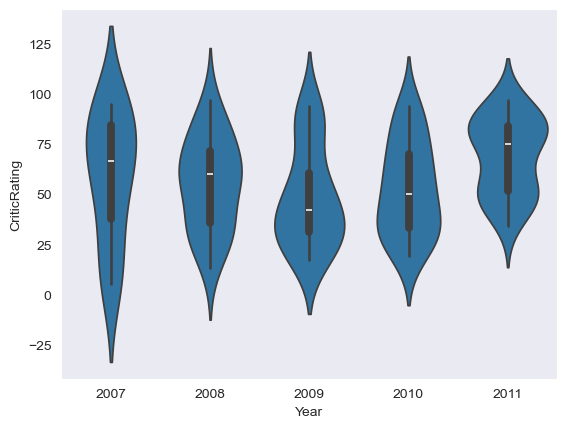

In [57]:
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y = 'CriticRating')
plt.show()

## Createing a Facet grid

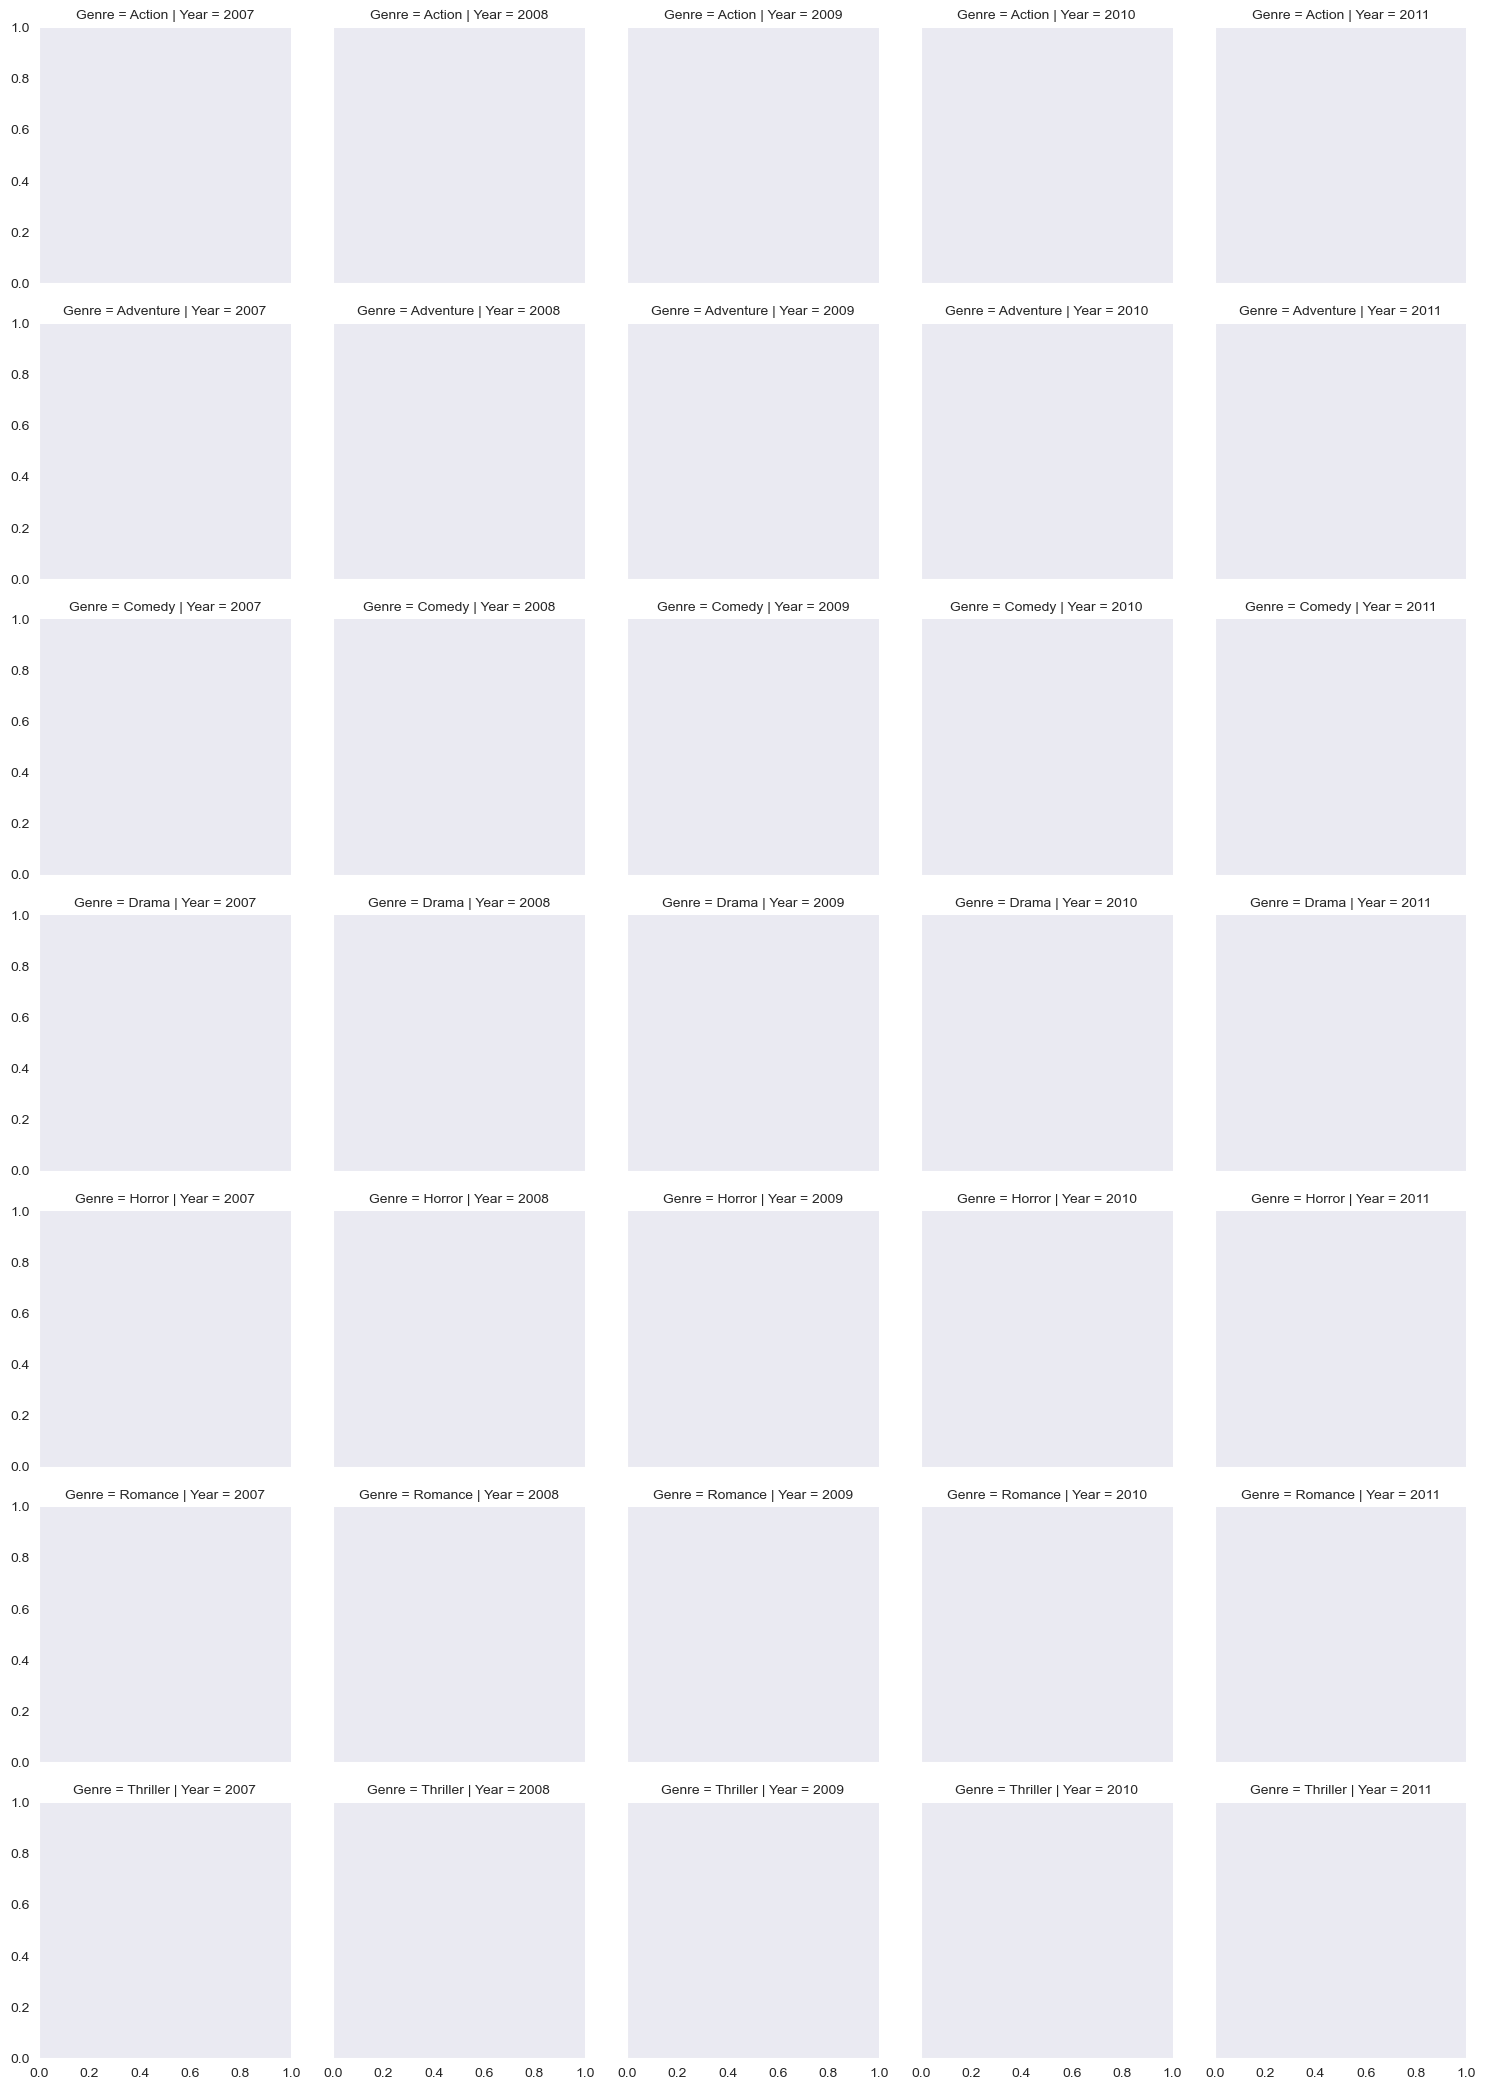

In [58]:
g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre') #kind of subplots
plt.show()

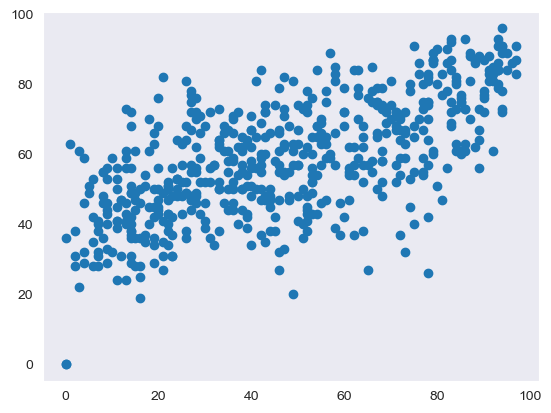

In [59]:
plt.scatter(movies.CriticRating,movies.AudienceRating)
plt.show()

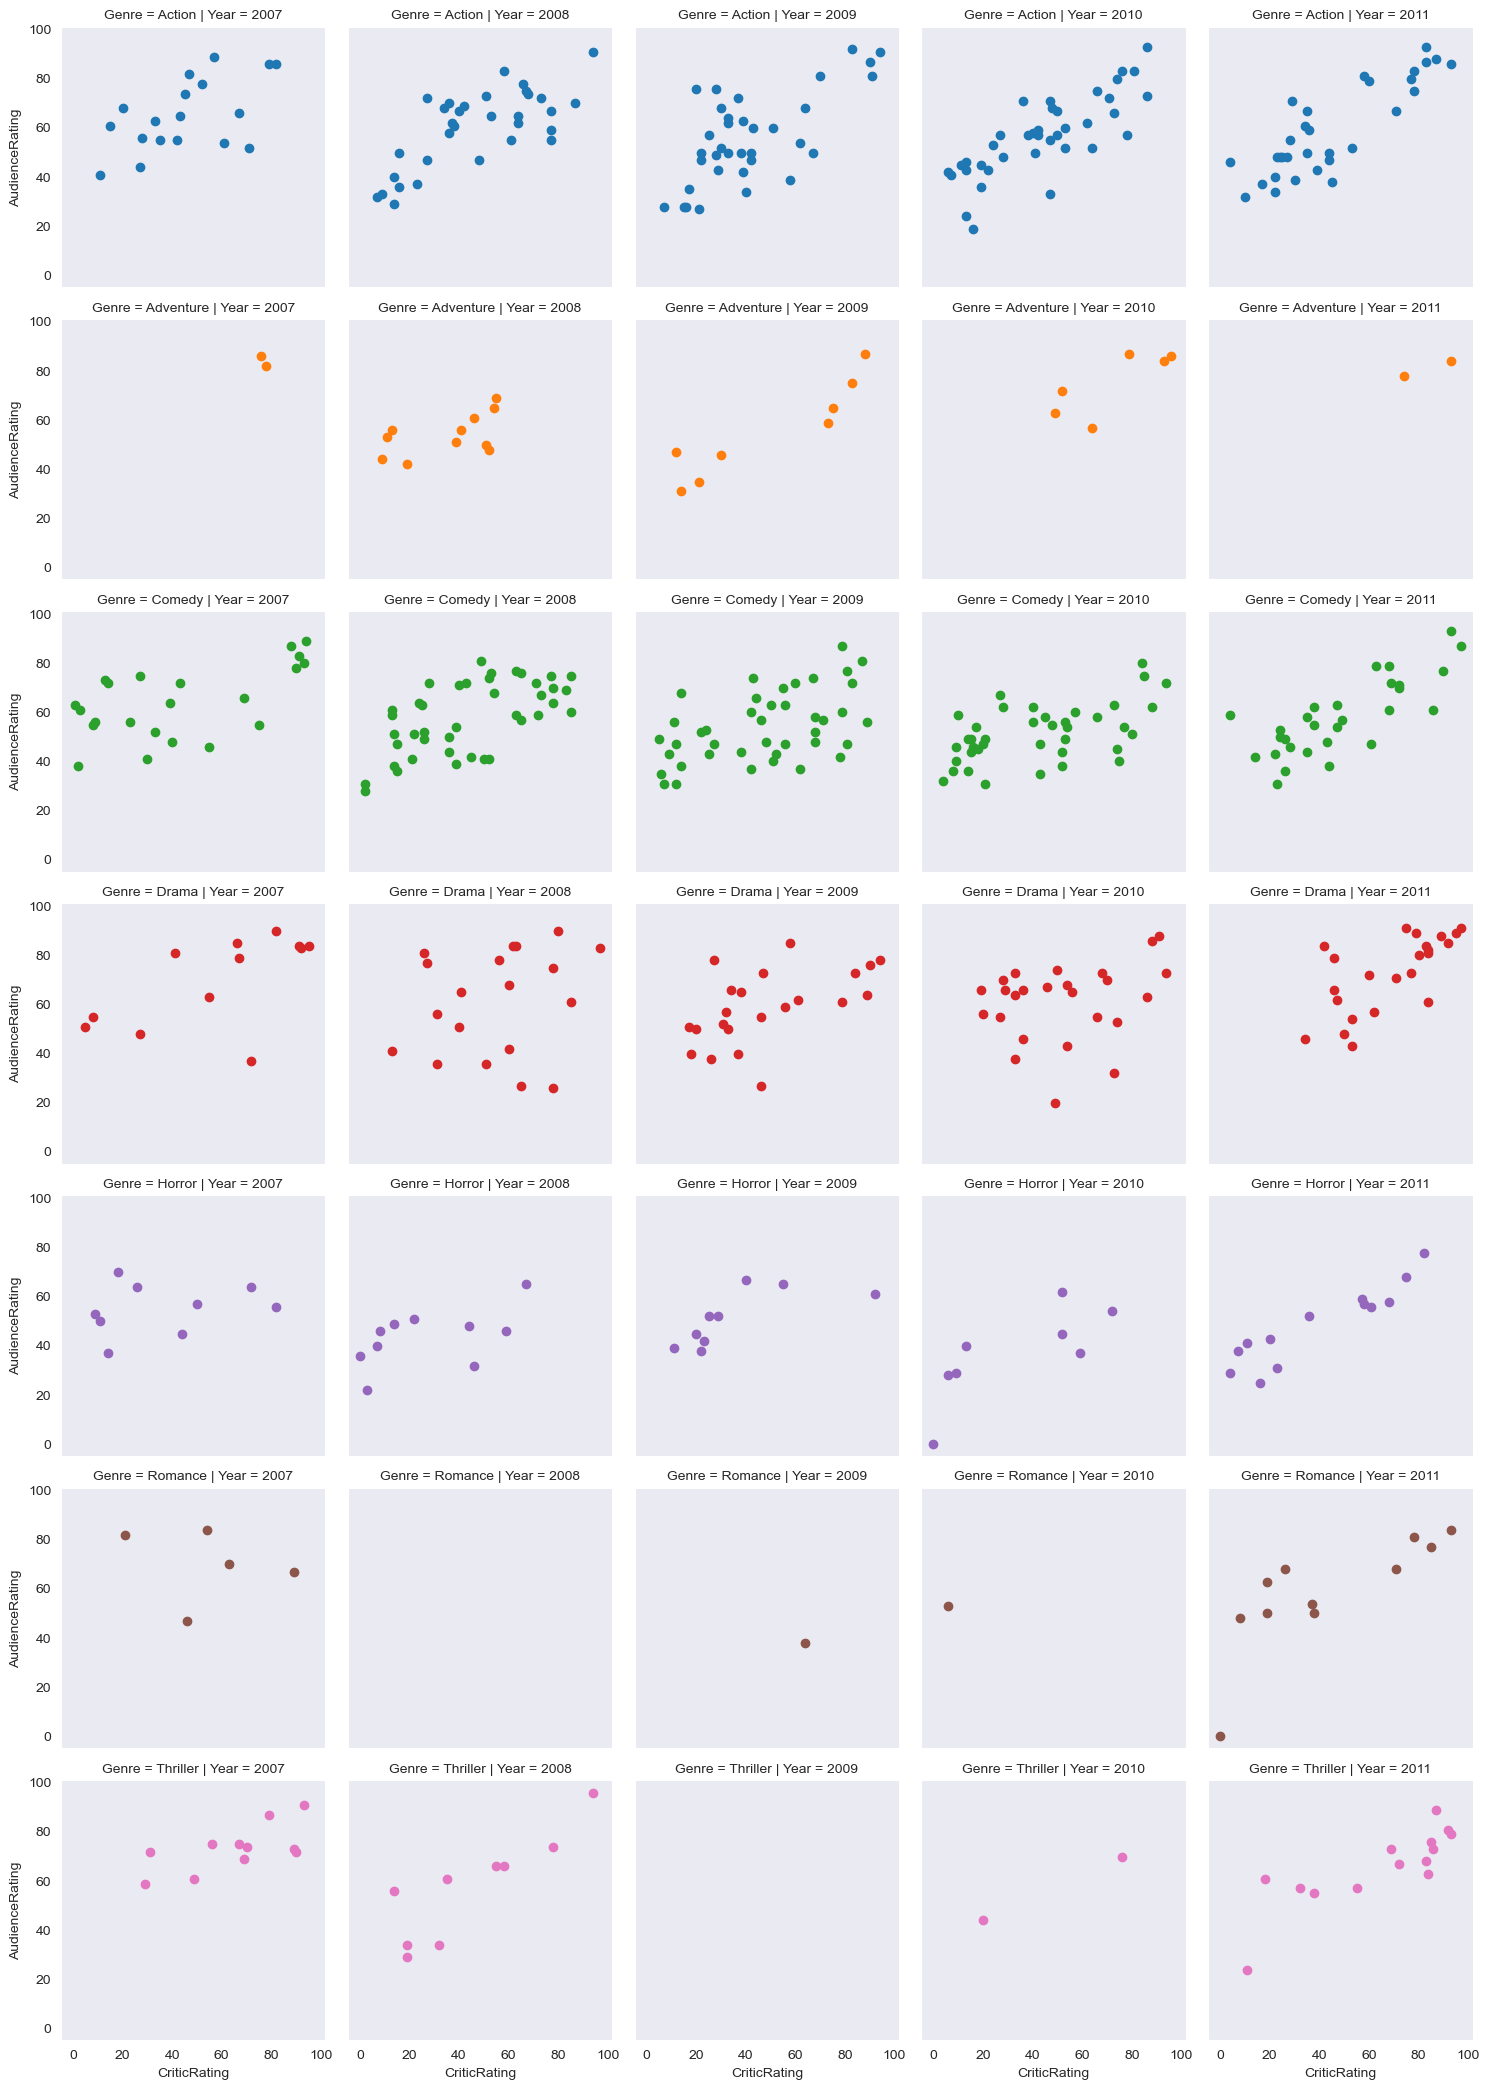

In [60]:
g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating' ) #scatterplots are mapped in facetgrid
plt.show()

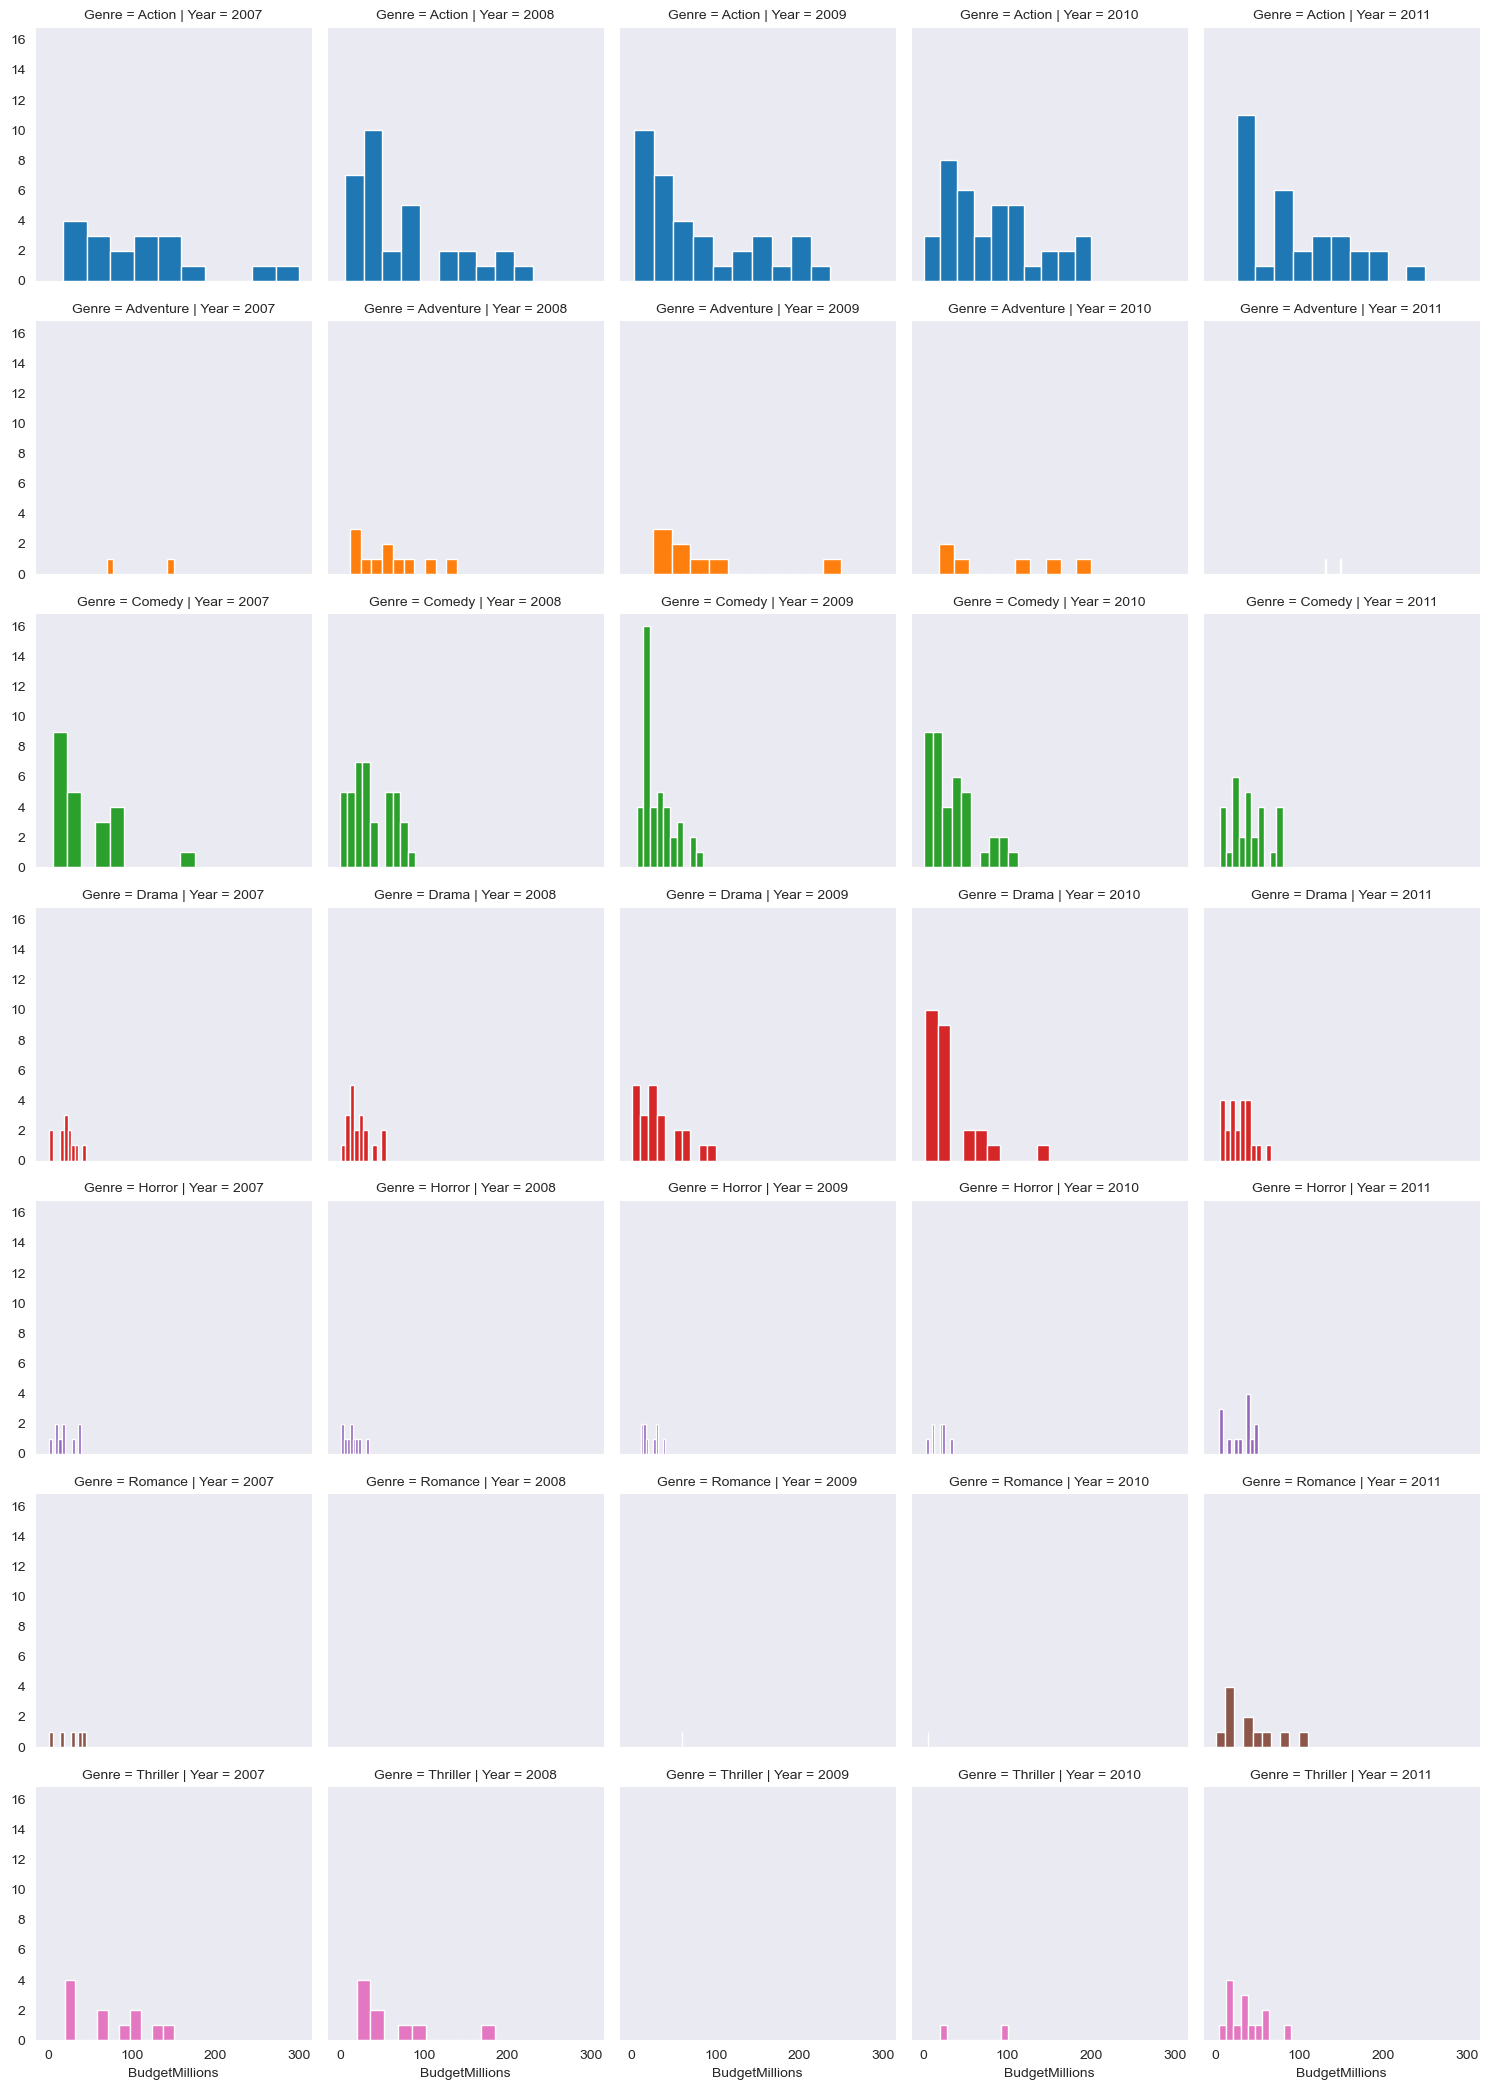

In [61]:
# you can populated any type of chat. 

g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.hist, 'BudgetMillions') #scatterplots are mapped in facetgrid
plt.show()

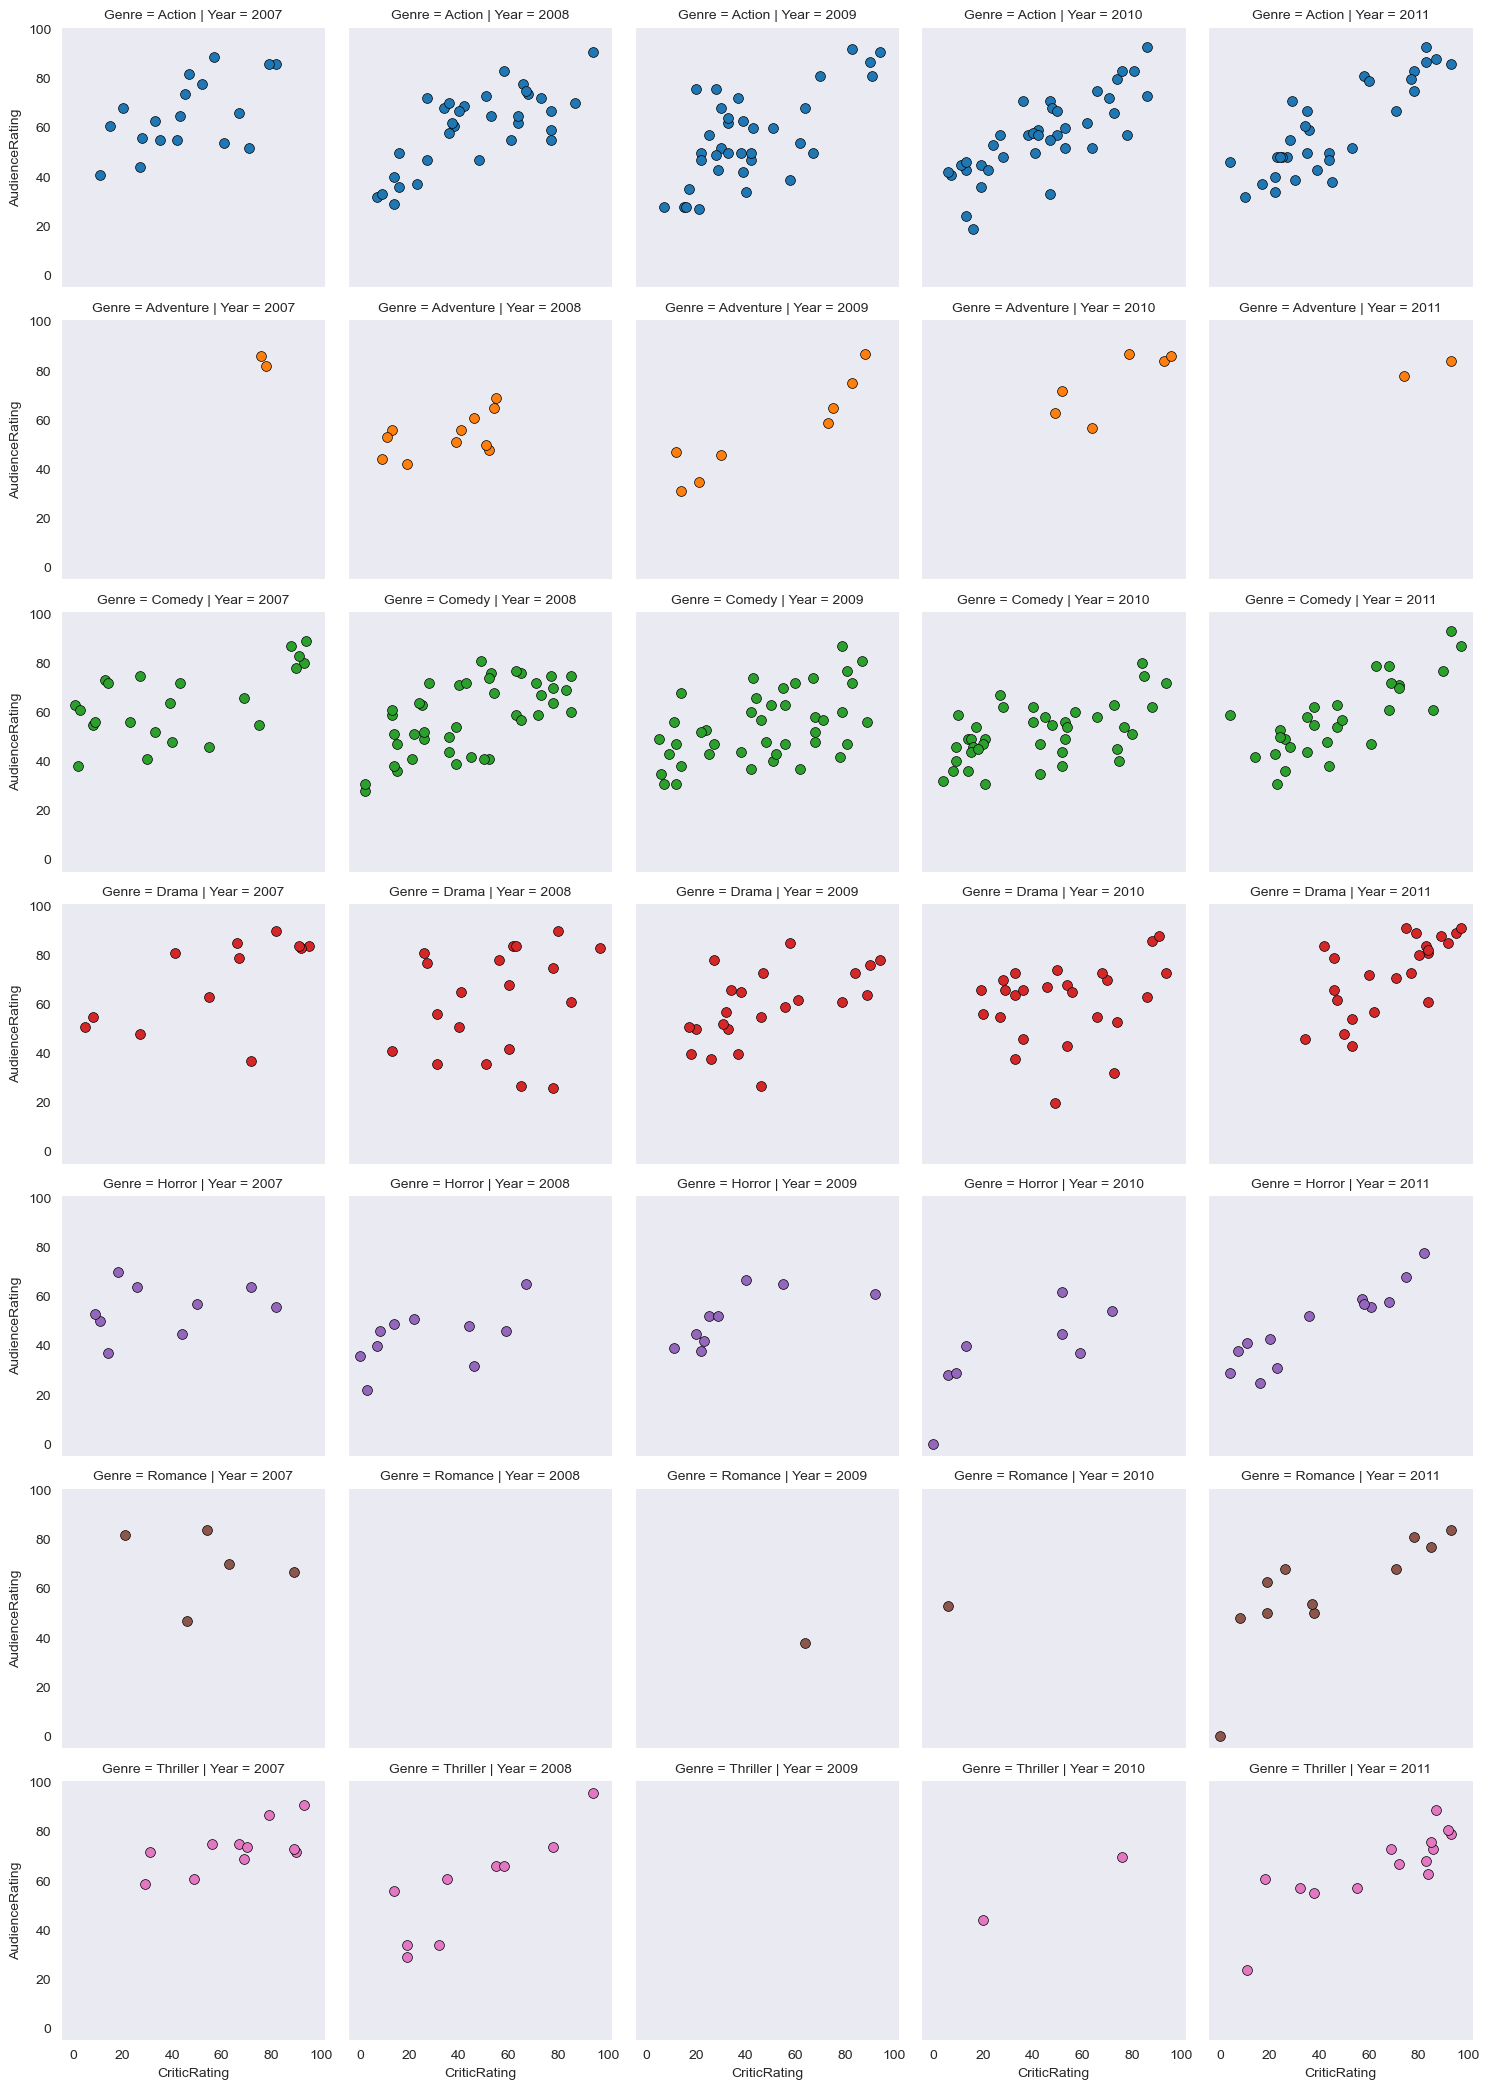

In [62]:
g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre')
kws = dict(s=50, linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating',**kws ) #scatterplots are mapped in facetgrid
plt.show()

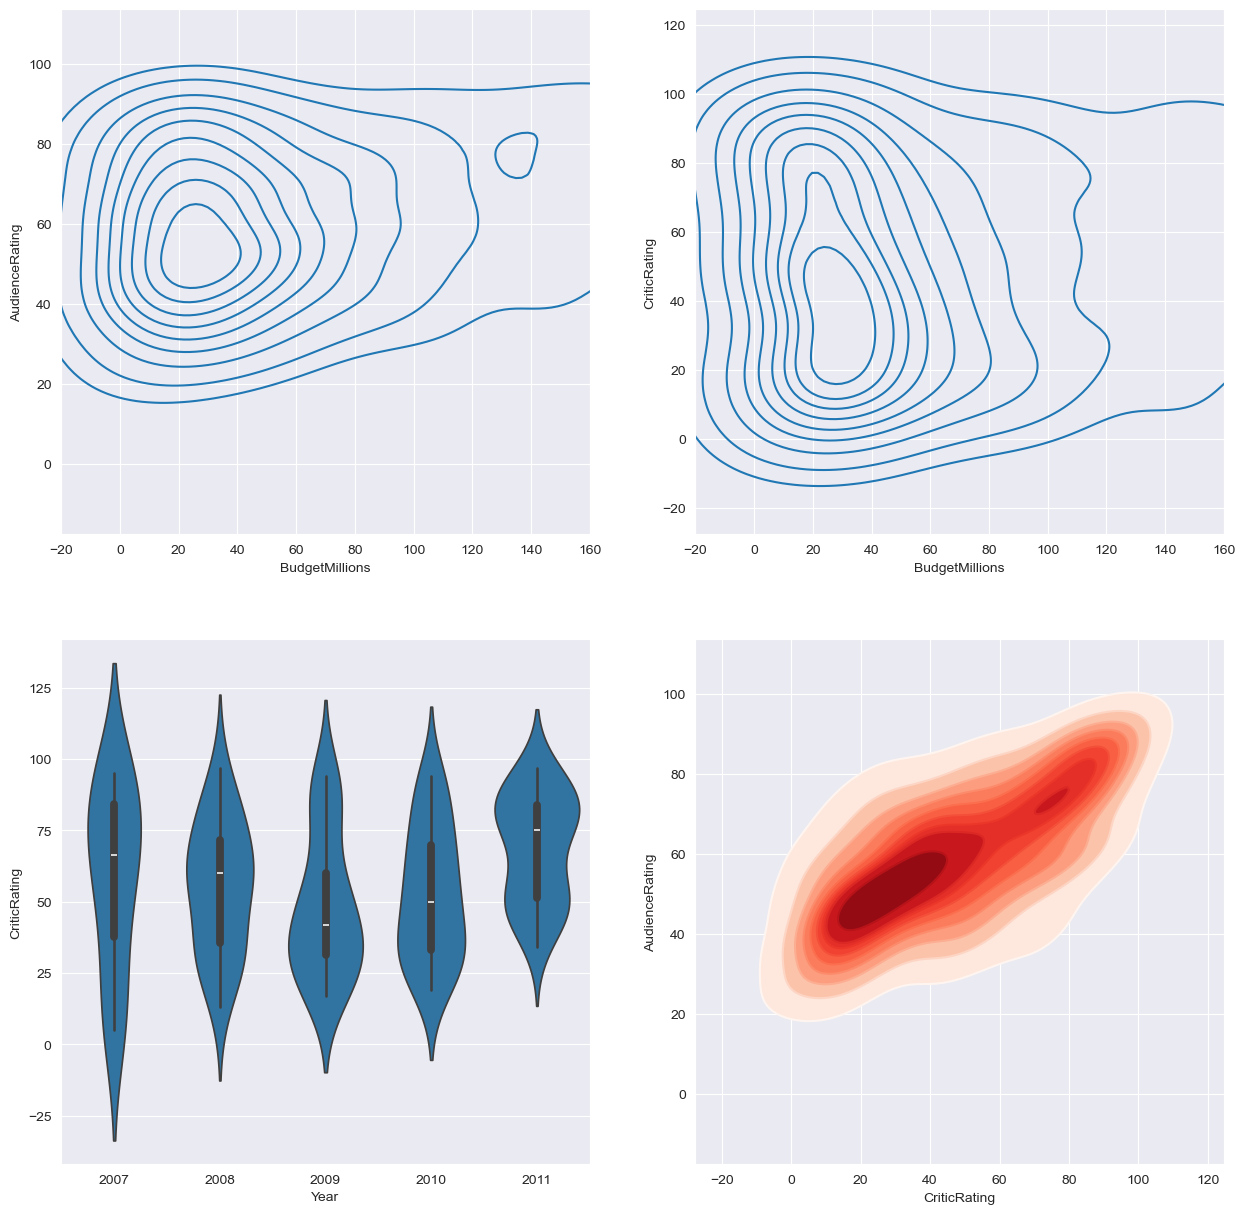

In [63]:
sns.set_style('darkgrid')
f, axes = plt.subplots (2,2, figsize = (15,15))

k1 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating,ax=axes[0,0])
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating,ax = axes[0,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y = 'CriticRating', ax=axes[1,0])

k4 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,shade = True,shade_lowest=False,cmap='Reds',ax=axes[1,1])

k4b = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating,cmap='Reds',ax = axes[1,1])

plt.show()

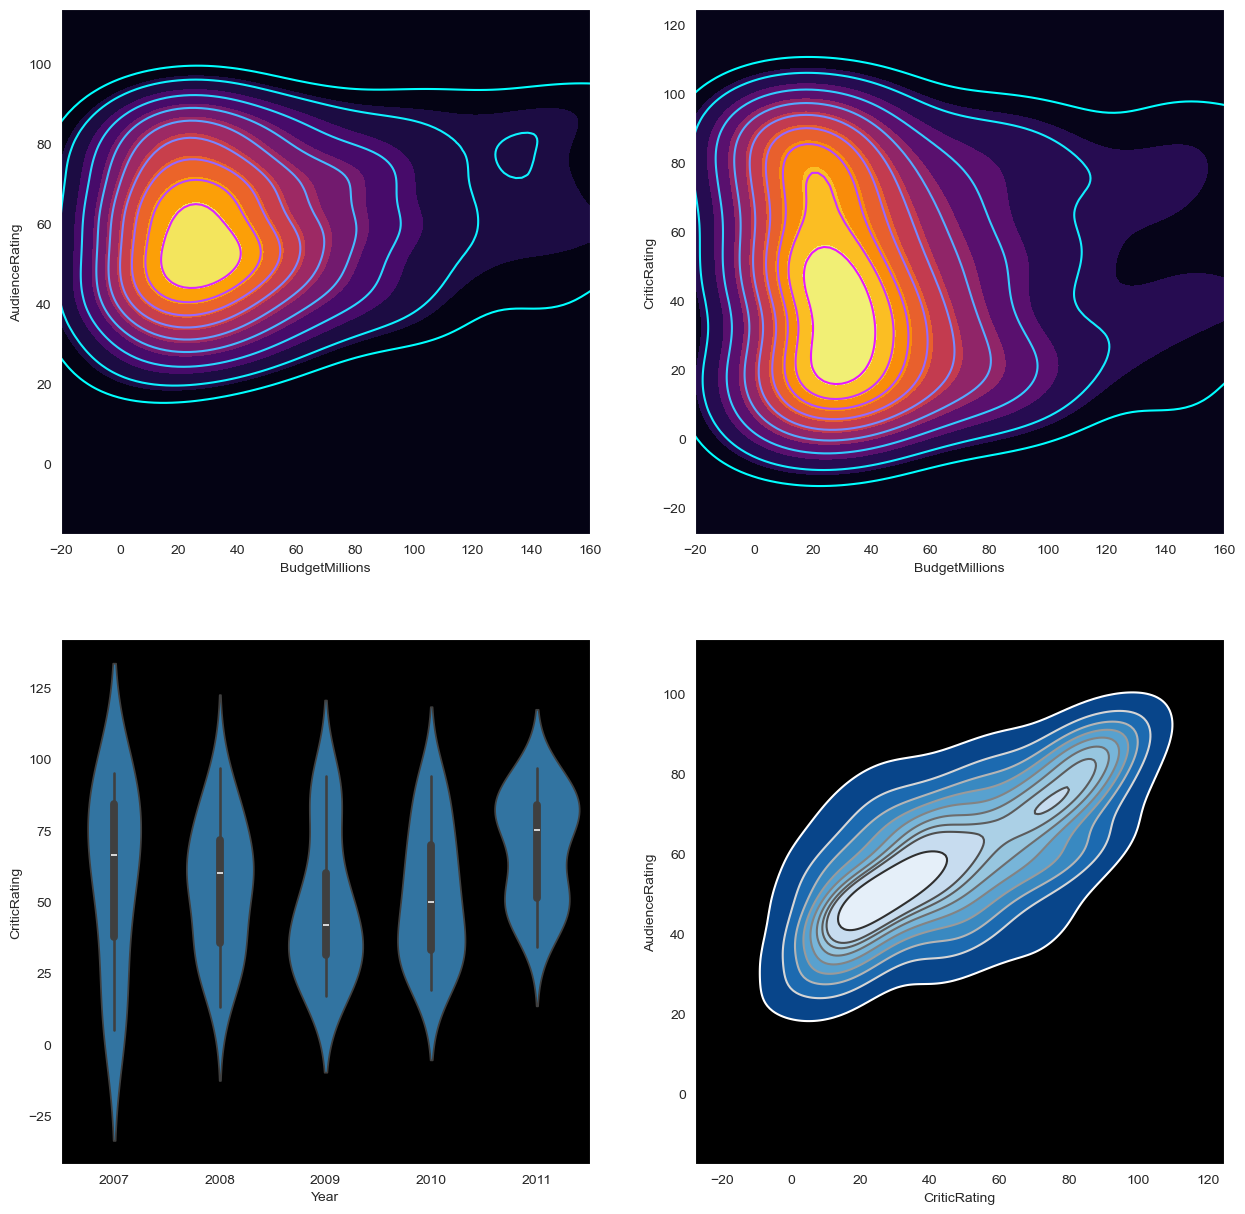

In [64]:
# How can you style your dashboard  using different color map

# python is not vectorize programming language
# Building dashboards (dashboard - combination of chats)

sns.set_style('dark',{'axes.facecolor':'black'})
f, axes = plt.subplots (2,2, figsize = (15,15))

#plot [0,0]
k1 = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating, \
                 shade = True, shade_lowest=True,cmap = 'inferno', \
                 ax = axes[0,0])
k1b = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating, \
                 cmap = 'cool',ax = axes[0,0])

#plot [0,1]
k2 = sns.kdeplot(x=movies.BudgetMillions, y=movies.CriticRating,\
                 shade=True, shade_lowest=True, cmap='inferno',\
                 ax = axes[0,1])
k2b = sns.kdeplot(x=movies.BudgetMillions,y=movies.CriticRating,\
                  cmap = 'cool', ax = axes[0,1])

#plot[1,0]
z = sns.violinplot(data=movies[movies.Genre=='Drama'], \
                   x='Year', y = 'CriticRating', ax=axes[1,0])

#plot[1,1]
k4 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, \
                 shade = True,shade_lowest=False,cmap='Blues_r', \
                 ax=axes[1,1])

k4b = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, \
                  cmap='gist_gray_r',ax = axes[1,1])


k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

plt.show()